# Critical Minerals Dependency and Source Reliability

### Introduction
Ensuring a secure supply of critical minerals is vital for the security and economic prosperity of the United States. The US Geological Survey's 2024 list of critical minerals outlines those essential for various industries, including defense, technology, and energy. This report aims to analyze the US's dependency on different countries for these critical minerals and assess the reliability of these sources under stressed circumstances.

### Data Source
Minerals Source:
https://www.usgs.gov/centers/national-minerals-information-center/mineral-commodity-summaries

US Allies, Competitors, and Neutral Parties: 
https://worldpopulationreview.com/country-rankings/united-states-allies

In [432]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import pycountry

In [433]:
Allies_path = 'https://raw.githubusercontent.com/Benson90/Data-608/main/US%20Allies.csv'
df_allies = pd.read_csv(Allies_path)

Critical_Mineral_path = 'https://raw.githubusercontent.com/Benson90/Data-608/main/Critical%20Minerals%202024.csv'
df_critical_mineral = pd.read_csv(Critical_Mineral_path)

In [434]:
def get_iso3(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except AttributeError:
        return None

df_allies['iso_a3'] = df_allies['Country'].apply(get_iso3)
df_critical_mineral['iso_a3'] = df_critical_mineral['primary_source_country'].apply(get_iso3)

In [435]:
manual_iso_mapping = {
    'Turkey': 'TUR',
    'Czech Republic': 'CZE',
    'South Korea': 'KOR',
    'Moldova': 'MDA',
    'Taiwan': 'TWN',
    'Tanzania': 'TZA',  
    'Republic of the Congo': 'COG',
    'Democratic Republic of the Congo': 'COD',
    'São Tomé and Príncipe': 'STP',
    'Micronesia': 'FSM',
    'Bolivia': 'BOL',
    'Russia': 'RUS',
    'Iran': 'IRN',
    'North Korea': 'PRK',
    'Venezuela': 'VEN',
    'Syria': 'SYR',
    'Myanmar (Burma)': 'MMR',
    'Laos': 'LAO',
    'Vietnam': 'VNM',
    'UAE': 'ARE',
    'Somaliland': 'SOM',  
    'Eretria': 'ERI',  
    'Ivory Coast': 'CIV',      
    'Cape Verde': 'CPV',
    'The Gambia': 'GMB',
}

df_allies.loc[df_allies['iso_a3'].isnull(), 'iso_a3'] = df_allies.loc[df_allies['iso_a3'].isnull(), 'Country'].map(manual_iso_mapping)
df_critical_mineral.loc[df_critical_mineral['iso_a3'].isnull(), 'iso_a3'] = df_critical_mineral.loc[df_critical_mineral['iso_a3'].isnull(), 'primary_source_country'].map(manual_iso_mapping)

In [436]:
colors = {'US Allies': 'blue', 'Competitors': 'red','Neutral Parties': '#D3D3D3'}

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df_allies, how='left', left_on='iso_a3', right_on='iso_a3')

world['Status'] = world['Status'].fillna('Neutral Parties')

fig = px.choropleth(world, 
                    locations='iso_a3', 
                    hover_name='name', 
                    color='Status',
                    projection='natural earth',
                    color_discrete_map=colors)


fig.show()

/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_4151/3221189545.py:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



### Map Showing US Allies, Competitors, and Neutral Parties
The map highlights most countries as US allies, with a smaller portion categorized as competitors, including China and Russia.

In [437]:
df_critical_mineral['Status'] = df_critical_mineral.merge(df_allies[['iso_a3', 'Status']], on='iso_a3', how='left')['Status']

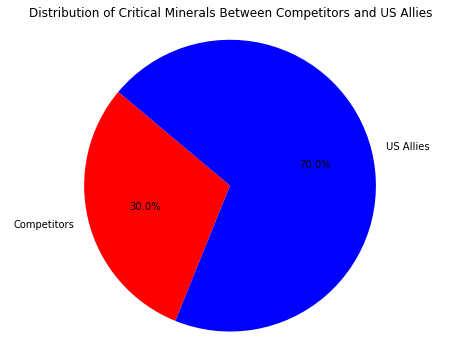

In [438]:
competitor_count = (df_critical_mineral_sorted['Status'] == 'Competitors').sum()
allies_count = (df_critical_mineral_sorted['Status'] == 'US Allies').sum()

total_count = competitor_count + allies_count
competitor_percentage = (competitor_count / total_count) * 100
allies_percentage = (allies_count / total_count) * 100

labels = ['Competitors', 'US Allies']
sizes = [competitor_percentage, allies_percentage]
colors = ['red', 'blue']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Critical Minerals Between Competitors and US Allies')
plt.axis('equal')
plt.show()

### Chart Illustrating Dependency on Source Countries
The chart demonstrates that 70% of critical minerals are sourced from US allies, emphasizing the importance of friendly nations in the global supply chain.

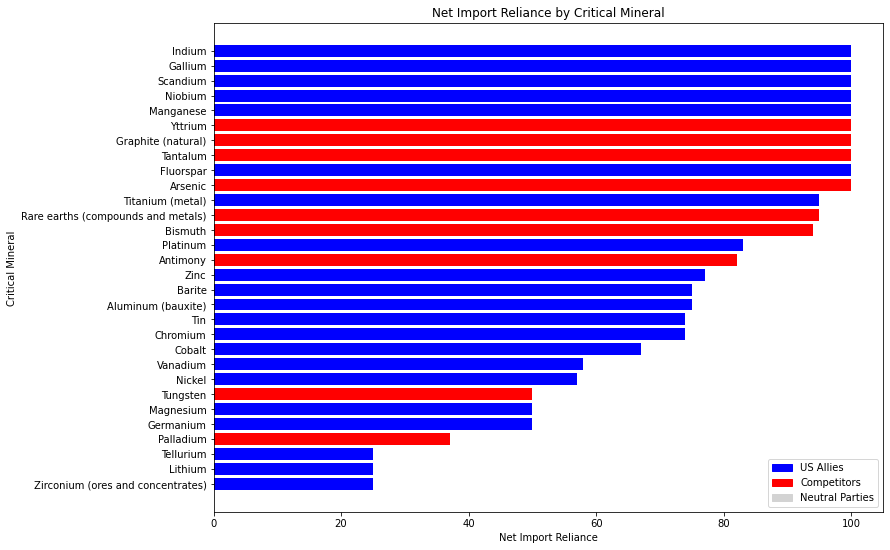

In [439]:
df_critical_mineral_sorted = df_critical_mineral.sort_values(by='Net_Import_Reliance', ascending=False)
colors = {'US Allies': 'blue', 'Competitors': 'red','Neutral Parties': '#D3D3D3'}
plt.figure(figsize=(12, 9))

bars = plt.barh(df_critical_mineral_sorted['Critical_mineral'], df_critical_mineral_sorted['Net_Import_Reliance'], color=[colors[status] for status in df_critical_mineral_sorted['Status']])

legend_handles = [
    mpatches.Patch(color='blue', label='US Allies'),
    mpatches.Patch(color='red', label='Competitors'),
    mpatches.Patch(color='#D3D3D3', label='Neutral Parties')
]

plt.legend(handles=legend_handles, loc='lower right')
plt.xlabel('Net Import Reliance')
plt.ylabel('Critical Mineral')
plt.title('Net Import Reliance by Critical Mineral')

plt.gca().invert_yaxis()

plt.show()

### Bar Chart Showing Critical Minerals and Net Import Reliance
This bar chart identifies critical minerals sourced from competitor nations and highlights those with high import reliance, indicating potential vulnerabilities in the supply chain.

In [440]:
competitor_df = df_critical_mineral[df_critical_mineral['Status'] == 'Competitors']
print(competitor_df[['Critical_mineral', 'Leading_source_country']])

                      Critical_mineral Leading_source_country
1                             Antimony                  China
2                              Arsenic                   Peru
4                              Bismuth                  China
10                  Graphite (natural)                  China
17                           Palladium                 Russia
19  Rare earths (compounds and metals)                  China
21                            Tantalum       Congo (Kinshasa)
25                            Tungsten                  China
27                             Yttrium                  China


### Source Reliability under Stressed Circumstances
The remaining 30% of critical minerals are sourced from competitor nations, with notable contributors being China and Russia.

In [441]:
competitor_df = df_critical_mineral[df_critical_mineral['Status'] == 'Competitors']

competitor_df['Source_Type'] = competitor_df.apply(lambda row: 'Replaceable source' if row['primary_source_country'] != row['Leading_source_country'] else 'Unreplaceable source', axis=1)

#print(competitor_df[['Critical_mineral', 'Leading_source_country', 'Source_Type']])

/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_4151/3115914299.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



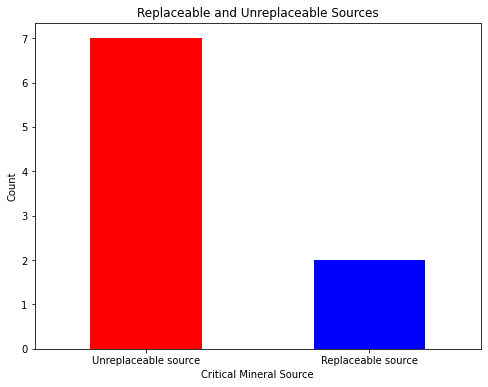

In [442]:
source_type_counts = competitor_df['Source_Type'].value_counts()

plt.figure(figsize=(8, 6))
source_type_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Replaceable and Unreplaceable Sources')
plt.xlabel('Critical Mineral Source')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()


### Chart Indicating Replacement Options
The chart identifies critical minerals where allies are the leading source countries, suggesting potential alternatives to reduce dependency on competitor nations.

### Advantage
Allies are generally considered reliable sources; allies are more likely to maintain stable supply chains even during times of conflict or crisis. 

### Challenge
Dependence on competitor nations poses a greater risk to the security of critical mineral supply. During heightened geopolitical tensions, competitor countries may restrict exports or use their resource dominance as a bargaining tool, leading to supply shortages and economic vulnerabilities for the US.

### Conclusion
The analysis reveals the critical importance of securing a stable supply of minerals from reliable sources to safeguard the United States' national interests. While allies currently contribute significantly to the supply chain, efforts to diversify sources and reduce dependency on competitor nations are essential to mitigate risks and ensure resilience in times of crisis. Strategic partnerships and diplomatic initiatives can be crucial in achieving these objectives and strengthening the nation's mineral security.